<p style="
 font-family: 'Meiryo UI';
 font-size: 30px;
 padding: 20px;
 text-align: center;
 color: #ffffff;
 border-radius: 20px;
 font-weight: bold;
 background-color: #0050a0;
 ">
 Tensorflow Keras Deep Neural Network
 </p>

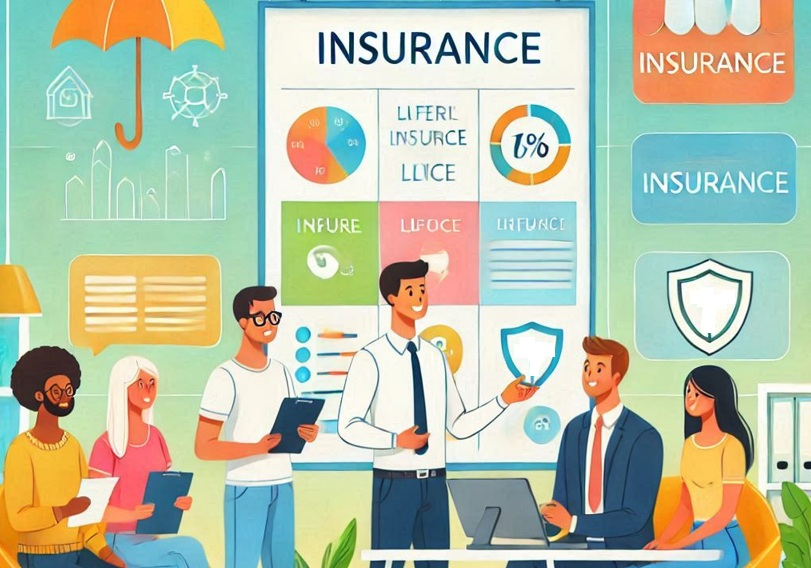

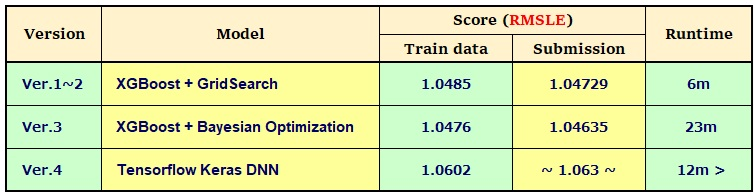

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Import Libraries
</p>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Activation, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Loading Dataset
</p>

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv',index_col=[0])
test = pd.read_csv('/kaggle/input/playground-series-s4e12/test.csv',index_col=[0])

In [3]:
train.tail().T

id,1199995,1199996,1199997,1199998,1199999
Age,36.0,54.0,19.0,55.0,21.0
Gender,Female,Male,Male,Male,Female
Annual Income,27316.0,35786.0,51884.0,NaN,NaN
Marital Status,Married,Divorced,Divorced,Single,Divorced
Number of Dependents,0.0,NaN,0.0,1.0,0.0
Education Level,Master's,Master's,Master's,PhD,PhD
Occupation,Unemployed,Self-Employed,NaN,NaN,NaN
Health Score,13.772907,11.483482,14.724469,18.547381,10.125323
Location,Urban,Rural,Suburban,Suburban,Rural
Policy Type,Premium,Comprehensive,Basic,Premium,Premium


<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Evaluation metric
</p>

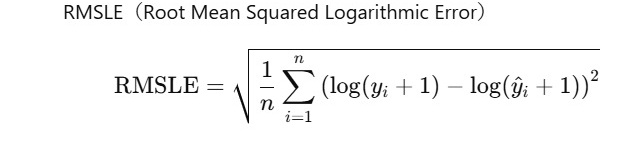

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Extract Target Column
</p>

In [4]:
# Extract the Target Column
target_column = (set(train.columns) - set(test.columns)).pop()

print(f"Target column: {target_column}")
print(f"Data type: {train[target_column].dtype}")

Target column: Premium Amount
Data type: float64


<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Histogram of Target Variable (Original and Log)
</p>

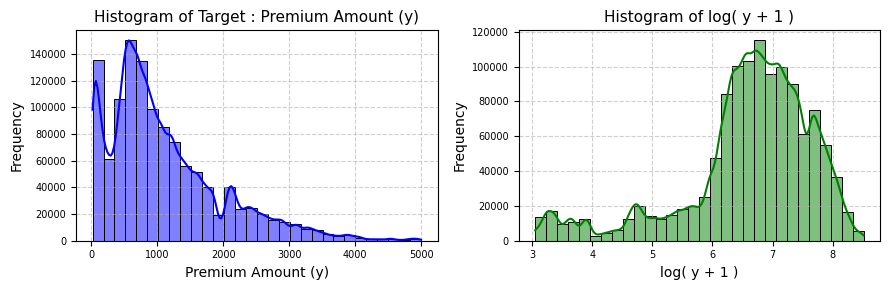

In [5]:
# Original target column
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
sns.histplot(train[target_column], kde=True, bins=30, color='blue')
plt.title(f'Histogram of Target : {target_column} (y)', fontsize=11)
plt.xlabel(f'{target_column} (y)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.grid(True, linestyle='--', alpha=0.6)

# log(y_train + 1)
y_train_log = np.log1p(train[target_column])
plt.subplot(1, 2, 2)
sns.histplot(y_train_log, kde=True, bins=30, color='green')
plt.title(f'Histogram of log( y + 1 )', fontsize=11)
plt.xlabel(f'log( y + 1 )', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

<p style="
 font-family: 'Meiryo UI';
 font-size: 28px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #2060A0; 
 display: inline-block;
 border-radius: 5px;
 padding: 15px 120px;
 margin-left: 0px;
">
  EDA (Exploratory Data Analysis)
</p>

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-null 

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Datetime Transformation
</p>

In [7]:
# Retrieve columns with 'object' data type
datetime_columns = train.select_dtypes(include=['object']).columns

for col in datetime_columns:
    try:
        # Convert the column to datetime format
        train[col] = pd.to_datetime(train[col], errors='raise')
        test[col] = pd.to_datetime(test[col], errors='raise')
        
        # Convert datetime to epoch time
        train[col] = train[col].astype(np.int64) / 10**9
        test[col] = test[col].astype(np.int64) / 10**9

        print(f"Converted '{col}' to epoch time.")
    except Exception:
        continue

Converted 'Policy Start Date' to epoch time.


In [8]:
train.tail().T

id,1199995,1199996,1199997,1199998,1199999
Age,36.0,54.0,19.0,55.0,21.0
Gender,Female,Male,Male,Male,Female
Annual Income,27316.0,35786.0,51884.0,NaN,NaN
Marital Status,Married,Divorced,Divorced,Single,Divorced
Number of Dependents,0.0,NaN,0.0,1.0,0.0
Education Level,Master's,Master's,Master's,PhD,PhD
Occupation,Unemployed,Self-Employed,NaN,NaN,NaN
Health Score,13.772907,11.483482,14.724469,18.547381,10.125323
Location,Urban,Rural,Suburban,Suburban,Rural
Policy Type,Premium,Comprehensive,Basic,Premium,Premium


<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Missing Values Count
</p>

In [9]:
train.isnull().sum()

Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Visualizing Missing Values
</p>

In [10]:
# Function to highlight missing values in the DataFrame
def highlight_missing(val):
    if pd.isna(val):
        # Apply styling for missing values
        return 'background-color: SkyBlue; border: 1px solid red'
    else:
        return ''

# Identify columns with missing values
columns_with_issues = train.columns[train.isnull().sum() > 0]

# Select representative rows with missing values for each column
representative_rows = pd.concat(
    [train[train[col].isnull()].iloc[:1] for col in columns_with_issues]
).drop_duplicates()

# Apply styling to highlight missing values in the selected rows
styled_df = representative_rows.T.style.applymap(highlight_missing)

# Display the styled DataFrame
display(styled_df)

id,83,22,45,14,1,6,11,15629,2,711358,28
Age,nan,22.000000,61.000000,40.000000,39.000000,41.000000,23.000000,25.000000,23.000000,64.000000,43.000000
Gender,Male,Male,Male,Female,Female,Male,Male,Female,Male,Male,Male
Annual Income,645.000000,nan,5095.000000,23897.000000,31678.000000,40336.000000,30983.000000,638.000000,25602.000000,30206.000000,1060.000000
Marital Status,Single,Divorced,nan,Divorced,Divorced,Married,Single,Divorced,Divorced,Married,Married
Number of Dependents,3.000000,4.000000,3.000000,nan,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,nan
Education Level,PhD,PhD,Master's,High School,Master's,PhD,Master's,PhD,High School,Master's,Master's
Occupation,Employed,nan,Employed,Self-Employed,nan,nan,nan,Employed,Self-Employed,Employed,Self-Employed
Health Score,30.766284,25.583790,40.886124,29.082036,15.569731,nan,5.813129,13.494674,47.177549,49.551038,41.376716
Location,Urban,Urban,Suburban,Suburban,Rural,Rural,Urban,Suburban,Suburban,Suburban,Suburban
Policy Type,Comprehensive,Comprehensive,Comprehensive,Basic,Comprehensive,Basic,Premium,Comprehensive,Premium,Basic,Premium


<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Filling missing values

</p>

In [11]:
# Fill missing values in numeric columns
numeric_columns = train.select_dtypes(include=['number']).columns
for col in numeric_columns:
    if col in test.columns:
        median_value = train[col].median()  # Calculate the median
        train[col].fillna(median_value, inplace=True)
        test[col].fillna(median_value, inplace=True)

# Fill missing values in object columns
object_columns = train.select_dtypes(include=['object']).columns
for col in object_columns:
    if col in test.columns:
        train[col].fillna("Unknown", inplace=True)
        test[col].fillna("Unknown", inplace=True)

In [12]:
train.isnull().sum()

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 35px;
 margin-left: 0px;
">
 Label Encoding for Categorical Features
</p>

In [13]:
le = LabelEncoder()
object_columns = train.select_dtypes(include=['object']).columns
for column_name in object_columns:
    train[column_name] = le.fit_transform(train[column_name])    
    test[column_name] = le.transform(test[column_name])

In [14]:
train.dtypes

Age                     float64
Gender                    int64
Annual Income           float64
Marital Status            int64
Number of Dependents    float64
Education Level           int64
Occupation                int64
Health Score            float64
Location                  int64
Policy Type               int64
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date       float64
Customer Feedback         int64
Smoking Status            int64
Exercise Frequency        int64
Property Type             int64
Premium Amount          float64
dtype: object

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Dataset Normalization
</p>

In [15]:
# Select numerical columns
numerical_columns = train.select_dtypes(include=['float64']).columns
numerical_columns = numerical_columns[numerical_columns != target_column]

# Applying Normalization
scaler = StandardScaler()
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])
test[numerical_columns] = scaler.transform(test[numerical_columns])

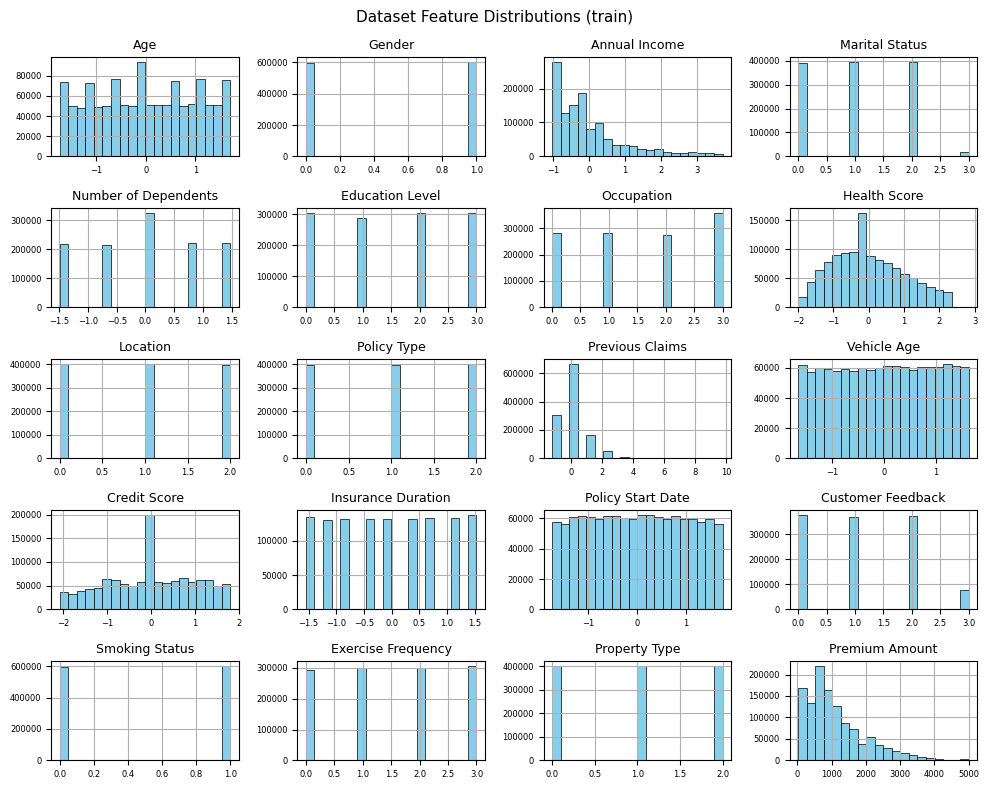

In [16]:
# Dataset Feature Distributions (train)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 8))
columns_to_plot = train.columns
for i, column in enumerate(columns_to_plot):
    ax = axes.flatten()[i]
    train[column].hist(ax=ax, bins=20, color='skyblue', edgecolor='black', linewidth=0.5)
    ax.set_title(column, fontsize=9)
    ax.tick_params(axis='both', which='major', labelsize=6)
plt.suptitle('Dataset Feature Distributions (train)', fontsize=11)
plt.tight_layout()
plt.show()

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Correlation Heatmap
</p>

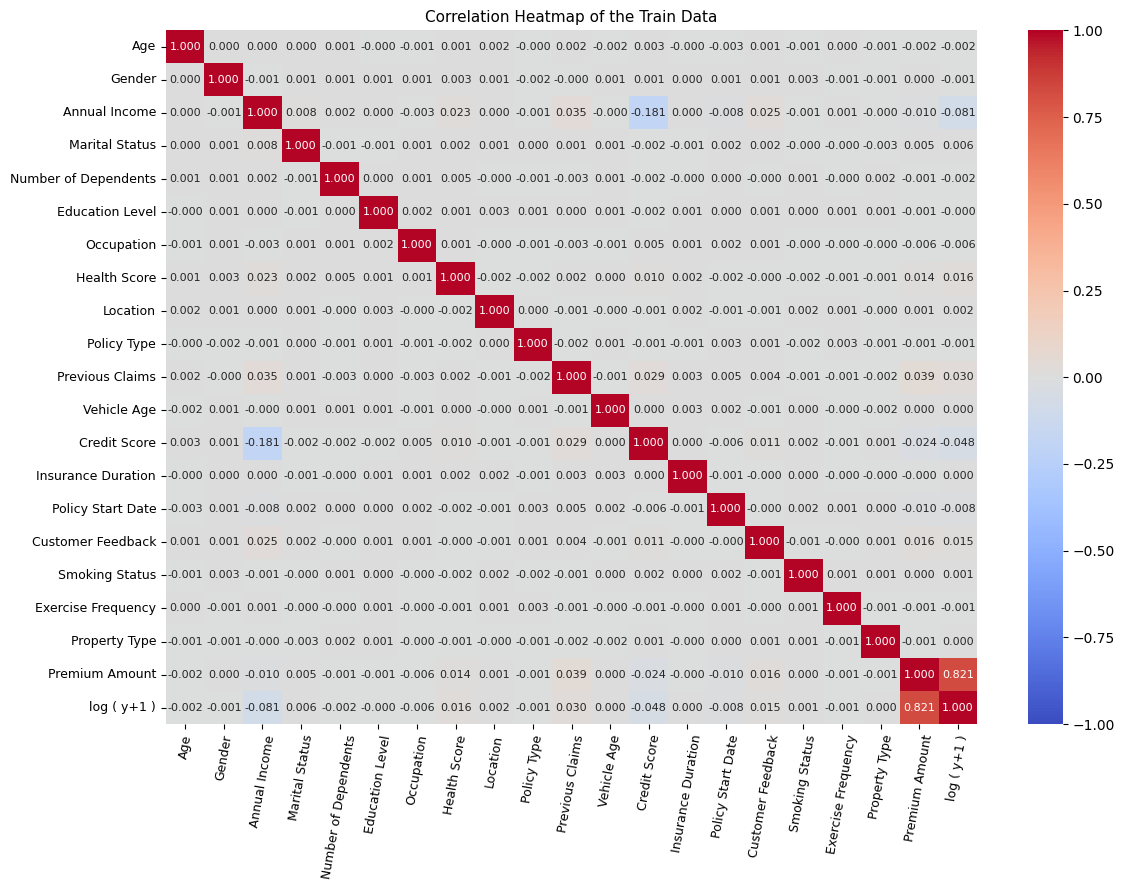

In [17]:
# Select only numeric columns from the training data
numeric_data = train.select_dtypes(include=['number'])

# Add a new column for the log(y+1)
numeric_data['log ( y+1 )'] = np.log1p(train[target_column])

# Create the heatmap
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmax=1, vmin=-1,
                      annot_kws={"size": 8}, fmt=".3f")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=80, fontsize=9)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=9)

plt.title("Correlation Heatmap of the Train Data", fontsize=11)
plt.tight_layout()
plt.show()

<p style="
 font-family: 'Meiryo UI';
 font-size: 30px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #2060A0; 
 display: inline-block;
 border-radius: 5px;
 padding: 15px 250px;
 margin-left: 0px;
">
  Model
</p>

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Prepare training data
</p>

In [18]:
# Prepare training data
X_train = train.drop([target_column], axis=1)
y_train = train[target_column]
y_train_log = np.log1p(y_train)

display(X_train.dtypes, y_train.dtypes, y_train_log.dtypes)

Age                     float64
Gender                    int64
Annual Income           float64
Marital Status            int64
Number of Dependents    float64
Education Level           int64
Occupation                int64
Health Score            float64
Location                  int64
Policy Type               int64
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date       float64
Customer Feedback         int64
Smoking Status            int64
Exercise Frequency        int64
Property Type             int64
dtype: object

dtype('float64')

dtype('float64')

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Model Setup
</p>

In [19]:
# Define the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(128, kernel_regularizer=l2(0.0001)), BatchNormalization(), Activation('relu'), Dropout(0.1),
    Dense(128, kernel_regularizer=l2(0.0001)), BatchNormalization(), Activation('relu'), Dropout(0.1),
    Dense(128, kernel_regularizer=l2(0.0001)), BatchNormalization(), Activation('relu'), Dropout(0.1),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Show the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,249 (145.50 KB)

 Trainable params: 36,481 (142.50 KB)

 Non-trainable params: 768 (3.00 KB)

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Model Training
</p>

In [20]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
search = model.fit(
    X_train, 
    y_train_log, 
    epochs=50,     # Number of epochs
    batch_size=2048,     # Batch size
    callbacks=[early_stopping],     # Early stopping
    validation_split=0.2,     # Validation data
    verbose=1     # Show logs
)

# Best RMSE
best_rmse = min(search.history['val_root_mean_squared_error'])  
print("Best RMSE: ", best_rmse)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 14.3895 - root_mean_squared_error: 3.5818 - val_loss: 1.2762 - val_root_mean_squared_error: 1.1167
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 1.4487 - root_mean_squared_error: 1.1915 - val_loss: 1.2100 - val_root_mean_squared_error: 1.0869
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 1.3864 - root_mean_squared_error: 1.1653 - val_loss: 1.2051 - val_root_mean_squared_error: 1.0850
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 1.3515 - root_mean_squared_error: 1.1506 - val_loss: 1.1915 - val_root_mean_squared_error: 1.0792
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 1.3326 - root_mean_squared_error: 1.1428 - val_loss: 1.1880 - val_root_mean_squared_error: 1.0781
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 1.3127 - root_mean_squared_error: 1.1346 - val_loss: 1.1792 - val_root_mean_squared_error: 1.0746
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 1

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Train target value prediction
</p>

In [21]:
# Train target value prediction

y_train_pred_log = model.predict(X_train).flatten()      # log(y+1)
y_train_pred = np.expm1(y_train_pred_log)

37500/37500 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step


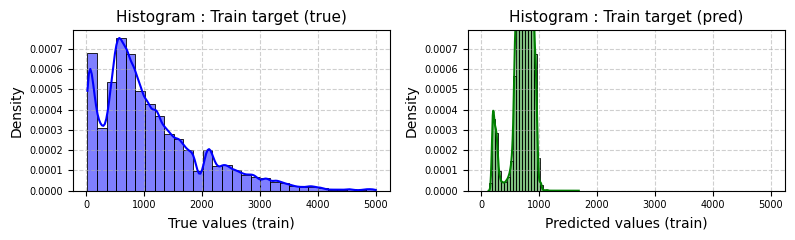

In [22]:
# Histogram of Target Variable

def plot_histogram(data, title, xlabel, color, x_limits=None, y_limits=None):
    sns.histplot(data, kde=True, bins=30, color=color, stat='density')
    plt.title(title, fontsize=11)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=7)
    plt.grid(True, linestyle='--', alpha=0.6)
    if x_limits:
        plt.xlim(x_limits)
    if y_limits:
        plt.ylim(y_limits)

plt.figure(figsize=(12, 2.5))

# Plot 1: True values (train)
plt.subplot(1, 3, 1)
plot_histogram(y_train, title='Histogram : Train target (true)', xlabel='True values (train)', color='blue')
x_limits = plt.gca().get_xlim()
y_limits = plt.gca().get_ylim()

# Plot 2: Predicted values (train)
plt.subplot(1, 3, 2)
plot_histogram(y_train_pred, title='Histogram : Train target (pred)', 
               xlabel='Predicted values (train)', color='green', x_limits=x_limits, y_limits=y_limits)

plt.tight_layout()
plt.show()

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Scatter Plot of True and Predicted Values 
</p>

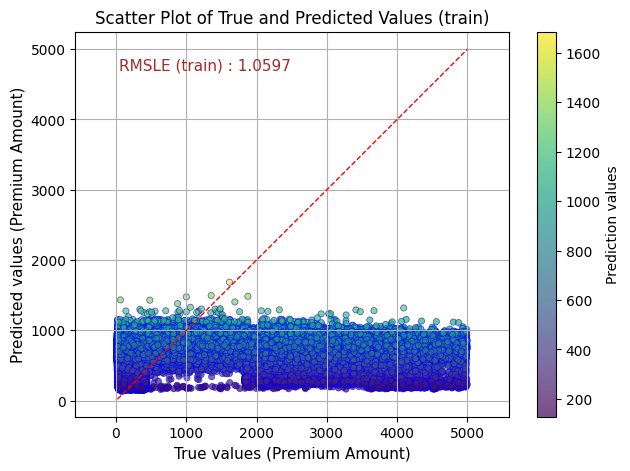

In [23]:
# Scatter Plot of True and Predicted Values (Training Target)
y_true = y_train
y_pred = y_train_pred

# Plot preparation
plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, c=y_pred, cmap='viridis', edgecolors='blue', s=20, alpha=0.7, linewidth=0.5)
cb = plt.colorbar()
cb.set_label('Prediction values')

# Plot the diagonal line
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', linewidth=1.0)
plt.axis('equal')

# Add RMSLE text to the plot
rmsle_text = f'RMSLE (train) : {round(best_rmse, 4)}'
plt.text(0.10, 0.90, rmsle_text, transform=plt.gca().transAxes, fontsize=11, color='brown')

# Labels and title
plt.xlabel(f'True values ({target_column})', fontsize=11)
plt.ylabel(f'Predicted values ({target_column})', fontsize=11)
plt.title('Scatter Plot of True and Predicted Values (train)', fontsize=12)
plt.grid(True)
plt.show()

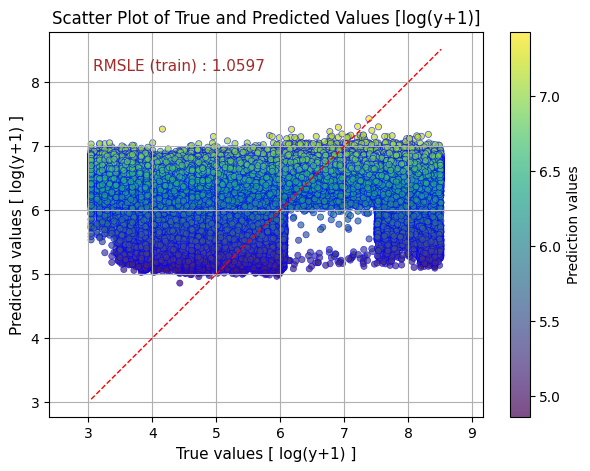

In [24]:
# Scatter Plot of True and Predicted Values [log(y+1)]
y_true = y_train_log
y_pred = y_train_pred_log

# Plot preparation
plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, c=y_pred, cmap='viridis', edgecolors='blue', s=20, alpha=0.7, linewidth=0.5)
cb = plt.colorbar()
cb.set_label('Prediction values')

# Plot the diagonal line
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', linewidth=1.0)
plt.axis('equal')

# Add RMSLE text to the plot
rmsle_text = f'RMSLE (train) : {round(best_rmse, 4)}'
plt.text(0.10, 0.90, rmsle_text, transform=plt.gca().transAxes, fontsize=11, color='brown')

# Labels and title
plt.xlabel('True values [ log(y+1) ]', fontsize=11)
plt.ylabel('Predicted values [ log(y+1) ]', fontsize=11)
plt.title('Scatter Plot of True and Predicted Values [log(y+1)]', fontsize=12)
plt.grid(True)
plt.show()

<p style="
 font-family: 'Meiryo UI';
 font-size: 30px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #2060A0; 
 display: inline-block;
 border-radius: 5px;
 padding: 15px 250px;
 margin-left: 0px;
">
  Submission
</p>

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Test target value prediction
</p>

In [25]:
# Test target value prediction

y_test_pred_log = model.predict(test).flatten()      # log(y+1)
y_test_pred = np.expm1(y_test_pred_log)

25000/25000 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step


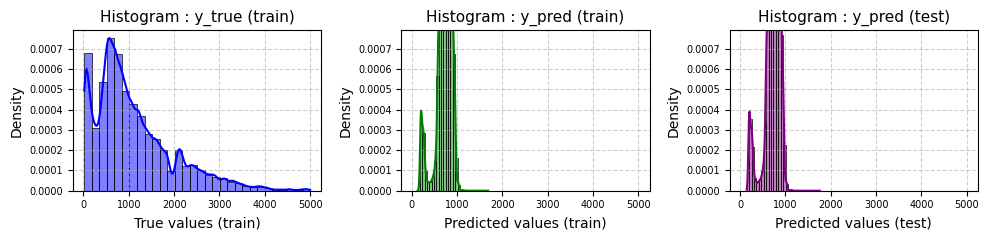

In [26]:
# Histogram of Target Variable

def plot_histogram(data, title, xlabel, color, x_limits=None, y_limits=None):
    sns.histplot(data, kde=True, bins=30, color=color, stat='density')
    plt.title(title, fontsize=11)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=7)
    plt.grid(True, linestyle='--', alpha=0.6)
    if x_limits:
        plt.xlim(x_limits)
    if y_limits:
        plt.ylim(y_limits)

plt.figure(figsize=(10, 2.5))

# Plot 1: True values (train)
plt.subplot(1, 3, 1)
plot_histogram(y_train, title='Histogram : y_true (train)', xlabel='True values (train)', color='blue')
x_limits = plt.gca().get_xlim()
y_limits = plt.gca().get_ylim()

# Plot 2: Predicted values (train)
plt.subplot(1, 3, 2)
plot_histogram(y_train_pred, title='Histogram : y_pred (train)', 
               xlabel='Predicted values (train)', color='green', x_limits=x_limits, y_limits=y_limits)

# Plot 3: Predicted values (test)
plt.subplot(1, 3, 3)
plot_histogram(y_test_pred, title='Histogram : y_pred (test)', 
               xlabel='Predicted values (test)', color='purple', x_limits=x_limits, y_limits=y_limits)

plt.tight_layout()
plt.show()

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 5px;
">
 Submission
 </p>

In [27]:
# Create the submission DataFrame
submission = pd.DataFrame({'id': test.index, target_column: y_test_pred})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

submission

,id,Premium Amount
0,1200000,900.919617
1,1200001,780.577271
2,1200002,775.998535
3,1200003,756.258362
4,1200004,735.262207
...,...,...
799995,1999995,926.033081
799996,1999996,590.478638
799997,1999997,793.251099
799998,1999998,928.164429
